REGRESIÓN LINEAL MÚLTIPLE

1. FASE RECOLECCIÓN

In [1]:
import numpy as np
import pandas as pd

In [2]:
insurance_data = pd.read_csv('insurance.csv')

2. FASE EXPLORATORIA

In [3]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
insurance_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
insurance_data.shape

(1338, 7)

In [6]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
insurance_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [9]:
insurance_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

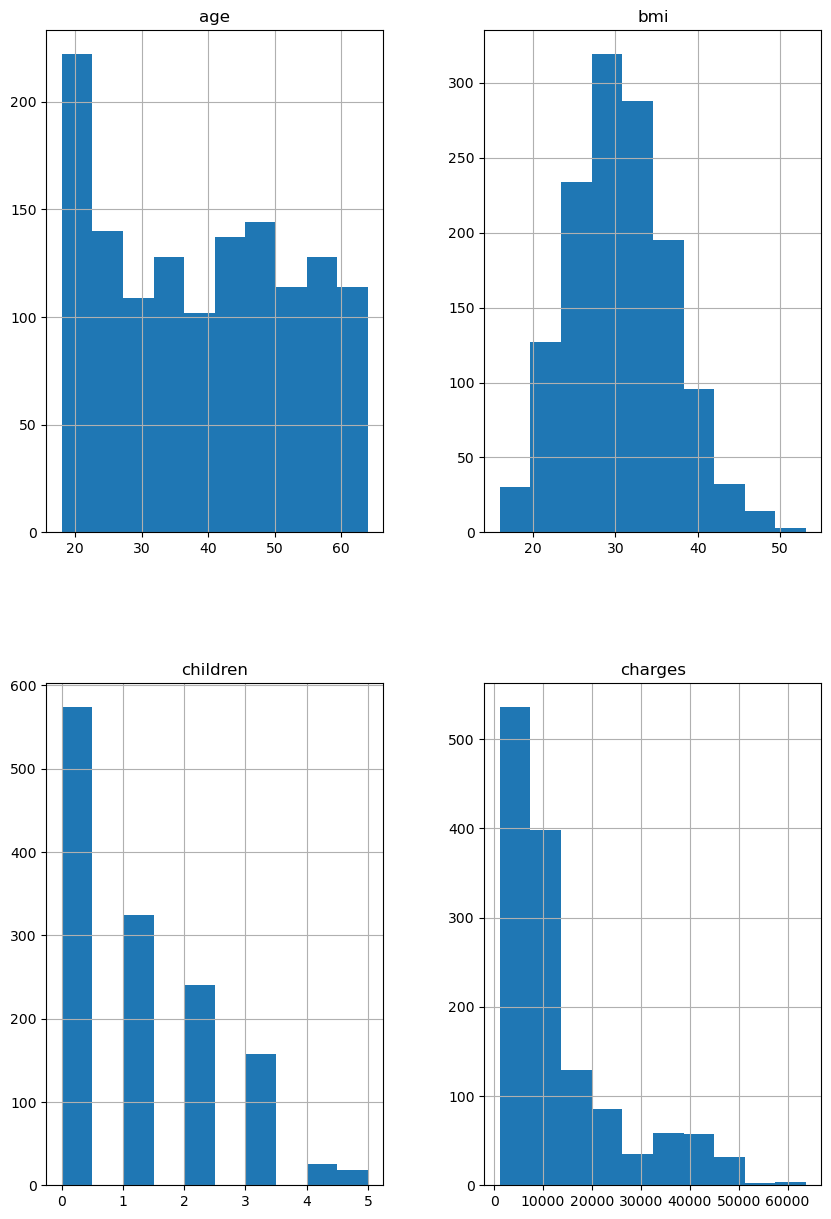

In [12]:
insurance_data.hist(figsize=(10,15))
plt.show()

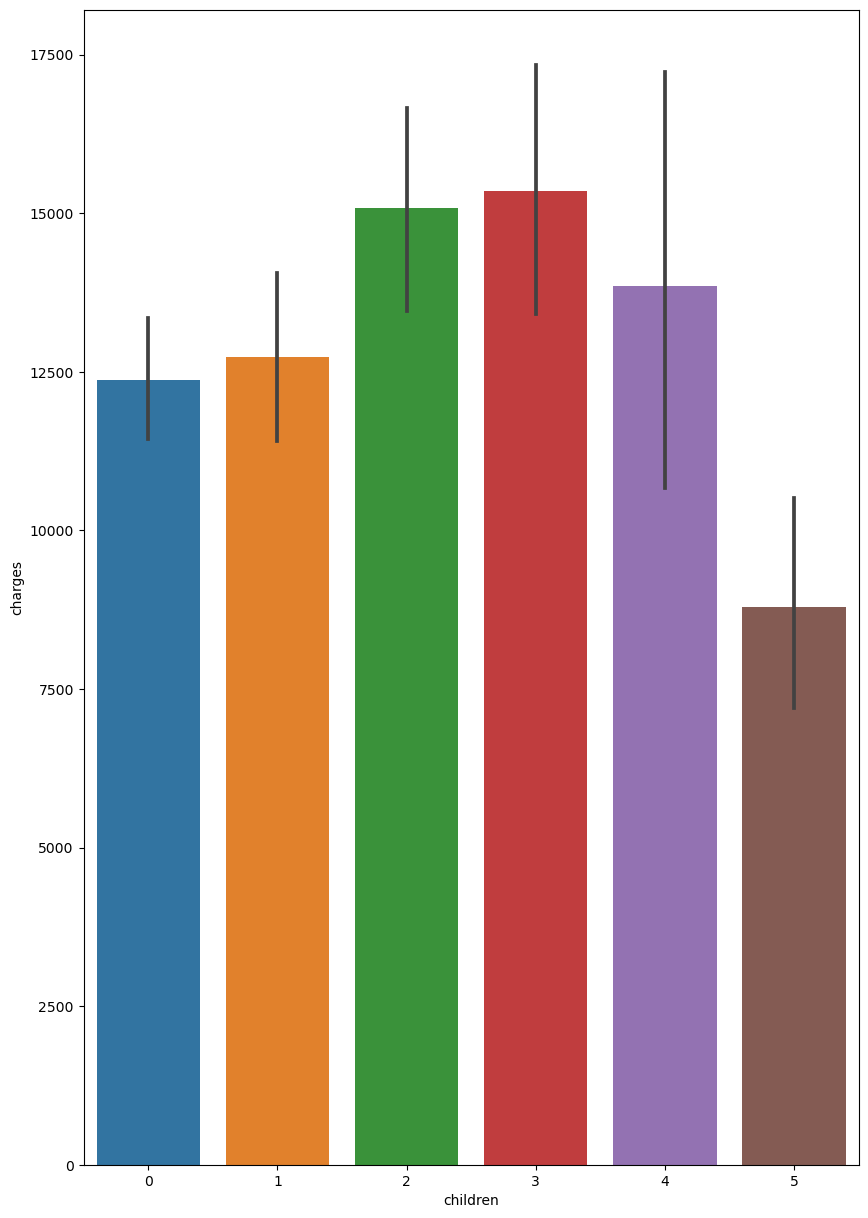

In [14]:
plt.figure(figsize=(10,15))
sns.barplot(x=insurance_data['children'], y=insurance_data['charges']);

Text(0.5, 1.0, 'Distribution of insurance charges')

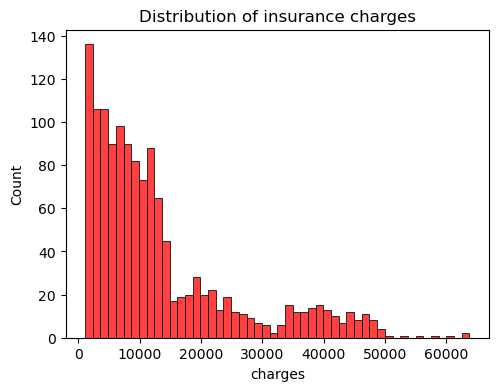

In [15]:
f = plt.figure(figsize=(12,4))

ax = f.add_subplot(121)
sns.histplot(insurance_data['charges'], bins=50, color='r', ax=ax)
ax.set_title('Distribution of insurance charges')

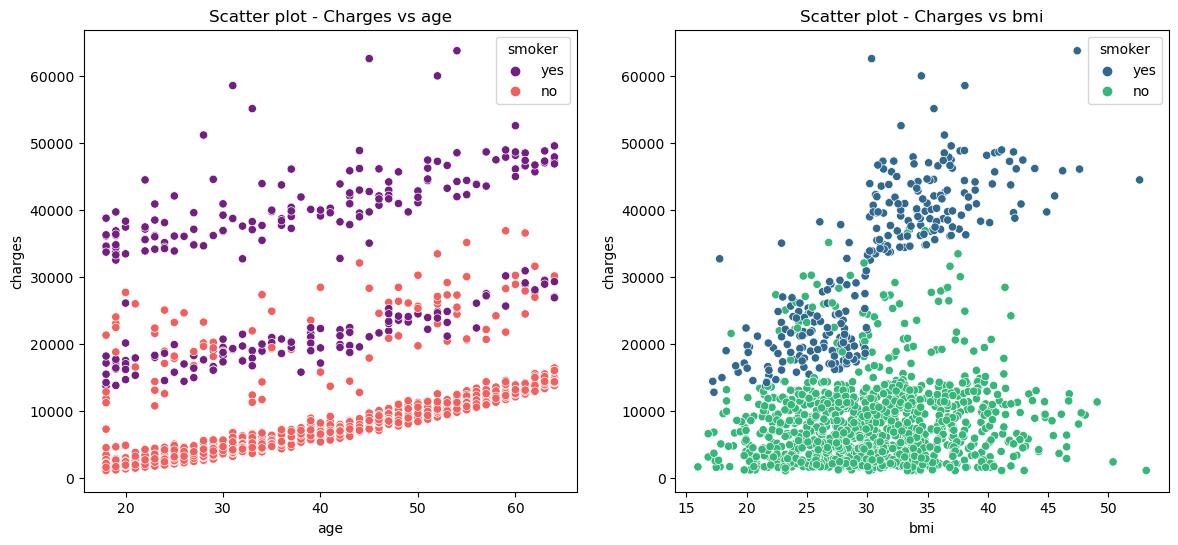

In [18]:
# Visualization distribución variable charge vs age y vs bmi
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age', y='charges', data=insurance_data, palette='magma', hue='smoker', ax=ax)
ax.set_title('Scatter plot - Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi', y='charges', data=insurance_data, palette='viridis', hue='smoker')
ax.set_title('Scatter plot - Charges vs bmi')
plt.savefig('sc.png')

/tmp/ipykernel_38496/489041896.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = insurance_data.corr()


<AxesSubplot: >

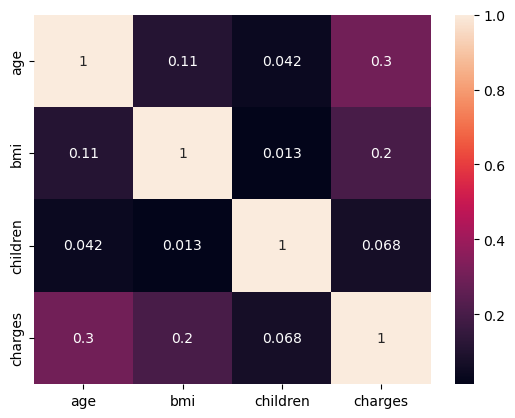

In [19]:
# Estudio correlación de variables
corr = insurance_data.corr()
sns.heatmap(corr, annot=True)

In [20]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

3. FASE ENTRENAMIENTO

**HIPOTESIS 1:** Utilizando solo variables numéricas

In [21]:
categorical_columns = ['sex', 'children', 'smoker', 'region']
insurance_data_hipot1 = insurance_data.drop(categorical_columns, axis=1)

In [22]:
insurance_data_hipot1.head()

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520


In [23]:
X_hipot1 = insurance_data_hipot1.drop('charges', axis=1) # Variables independientes
y_hipot1 = insurance_data_hipot1['charges'] # Variable dependiente

In [25]:
from sklearn.model_selection import train_test_split

X_hipot1_train, X_hipot1_test, y_hipot1_train, y_hipot1_test = train_test_split(X_hipot1, y_hipot1, test_size=0.20, random_state=43)

In [27]:
from sklearn.linear_model import LinearRegression
regression_lineal = LinearRegression()
regression_lineal.fit(X_hipot1_train, y_hipot1_train);


3.1 FASE VALIDACION

In [28]:
from sklearn.metrics import mean_squared_error

In [30]:
prediccion_entrenamiento = regression_lineal.predict(X_hipot1_train)

mse_hipot1_train = mean_squared_error(y_true=y_hipot1_train, y_pred=prediccion_entrenamiento)
print(f'Error Cuadrático Medio (MSE) TRAIN={mse_hipot1_train}')

prediccion_entrenamiento = regression_lineal.predict(X_hipot1_test)

mse_hipot1_test = mean_squared_error(y_true=y_hipot1_test, y_pred=prediccion_entrenamiento)

print(f'Error Cuadrático Medio (MSE) TEST={mse_hipot1_test}')

Error Cuadrático Medio (MSE) TRAIN=128480604.7086929
Error Cuadrático Medio (MSE) TEST=133385030.40740176


**HIPOTESIS 2:** Transformamos las variables categóricas en variables numéricas

In [32]:
insurance_data_hipot2 = pd.get_dummies(data=insurance_data,
                                        prefix='OHE', 
                                        prefix_sep='_',
                                        columns=categorical_columns,
                                        drop_first=True,
                                        dtype='int8')
                                        

In [33]:
insurance_data_hipot2.head()

,age,bmi,charges,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0


In [34]:
X_hipot2 = insurance_data_hipot2.drop('charges', axis=1)
y_hipot2 = insurance_data_hipot2['charges']
X_hipot2_train, X_hipot2_test, y_hipot2_train, y_hipot2_test = train_test_split(X_hipot2, y_hipot2, test_size=0.2, random_state=43)

In [36]:
regression_lineal = LinearRegression()
regression_lineal.fit(X_hipot2_train, y_hipot2_train);

**3.2 FASE VALIDACIÓN**

In [37]:
prediccion_entrenamiento = regression_lineal.predict(X_hipot2_train)

mse_hipot2_train = mean_squared_error(y_true=y_hipot2_train, y_pred=prediccion_entrenamiento)
print(f'Error Cuadrático Medio (MSE) TRAIN={mse_hipot1_train}')
print(f'Error Cuadrático Medio (MSE) TRAIN={mse_hipot2_train}')

prediccion_entrenamiento = regression_lineal.predict(X_hipot2_test)

mse_hipot2_test = mean_squared_error(y_true=y_hipot2_test, y_pred=prediccion_entrenamiento)
print(f'Error Cuadrático Medio (MSE) test={mse_hipot1_test}')
print(f'Error Cuadrático Medio (MSE) test={mse_hipot2_test}')




Error Cuadrático Medio (MSE) TRAIN=128480604.7086929
Error Cuadrático Medio (MSE) TRAIN=34753333.94146834
Error Cuadrático Medio (MSE) test=133385030.40740176
Error Cuadrático Medio (MSE) test=43379952.196552105


**HIPOTESIS 3:** Normalización de variable objetivo.

In [65]:
insurance_data_hipot3 = pd.get_dummies(data=insurance_data,
                                        prefix='OHE', 
                                        prefix_sep='_',
                                        columns=categorical_columns,
                                        drop_first=True,
                                        dtype='int8')

In [66]:
X_hipot3 = insurance_data_hipot3.drop('charges', axis=1)
y_hipot3 = insurance_data_hipot3['charges']

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

y_hipot3 = scaler.fit_transform(y_hipot3.to_numpy().reshape(-1,1))

y_hipot3 = y_hipot3.reshape(1,-1)[0]

In [68]:
y_hipot3

array([ 0.2985838 , -0.95368917, -0.72867467, ..., -0.96159623,
       -0.93036151,  1.31105347])

In [69]:

X_hipot3_train, X_hipot3_test, y_hipot3_train, y_hipot3_test = train_test_split(X_hipot3, y_hipot3, test_size=0.2, random_state=43)

In [70]:
regression_lineal = LinearRegression()
regression_lineal.fit(X_hipot3_train, y_hipot3_train);

In [71]:
prediccion_entrenamiento = regression_lineal.predict(X_hipot3_train)

mse_hipot3_train = mean_squared_error(y_true=y_hipot3_train, y_pred=prediccion_entrenamiento)
print(f'Error Cuadrático Medio (MSE) TRAIN={mse_hipot1_train}')
print(f'Error Cuadrático Medio (MSE) TRAIN={mse_hipot2_train}')
print(f'Error Cuadrático Medio (MSE) TRAIN={mse_hipot3_train}')

prediccion_entrenamiento = regression_lineal.predict(X_hipot3_test)

mse_hipot3_test = mean_squared_error(y_true=y_hipot3_test, y_pred=prediccion_entrenamiento)
print(f'Error Cuadrático Medio (MSE) test={mse_hipot1_test}')
print(f'Error Cuadrático Medio (MSE) test={mse_hipot2_test}')
print(f'Error Cuadrático Medio (MSE) test={mse_hipot3_test}')

Error Cuadrático Medio (MSE) TRAIN=128480604.7086929
Error Cuadrático Medio (MSE) TRAIN=34753333.94146834
Error Cuadrático Medio (MSE) TRAIN=0.23715489186563482
Error Cuadrático Medio (MSE) test=133385030.40740176
Error Cuadrático Medio (MSE) test=43379952.196552105
Error Cuadrático Medio (MSE) test=0.2960224734017291
